In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets

In [2]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [6]:
data_frame.shape

(569, 31)

In [7]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [8]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

1 --> Benign

0 --> Malignant

In [9]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [11]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [12]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [13]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________


In [17]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 2s 69ms/step - loss: 11.4290 - accuracy: 0.5623 - val_loss: 3.5168 - val_accuracy: 0.3478
Epoch 2/10
13/13 [==============================] - 0s 11ms/step - loss: 4.1934 - accuracy: 0.3643 - val_loss: 1.3820 - val_accuracy: 0.3043
Epoch 3/10
13/13 [==============================] - 0s 11ms/step - loss: 1.6351 - accuracy: 0.5134 - val_loss: 1.3263 - val_accuracy: 0.3261
Epoch 4/10
13/13 [==============================] - 0s 11ms/step - loss: 1.0189 - accuracy: 0.5281 - val_loss: 0.4758 - val_accuracy: 0.7826
Epoch 5/10
13/13 [==============================] - 0s 12ms/step - loss: 0.6094 - accuracy: 0.6748 - val_loss: 0.4062 - val_accuracy: 0.8261
Epoch 6/10
13/13 [==============================] - 0s 11ms/step - loss: 0.4958 - accuracy: 0.8020 - val_loss: 0.3316 - val_accuracy: 0.8913
Epoch 7/10
13/13 [==============================] - 0s 11ms/step - loss: 0.4429 - accuracy: 0.8362 - val_loss: 0.3166 - val_accuracy: 0.8913
Epoch 8/10
1

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [20]:
model2 = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 2)                 42        
                                                                 
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________


In [22]:
# compiling the Neural Network

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history_2 = model2.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 19ms/step - loss: 0.1360 - accuracy: 0.9609 - val_loss: 0.1288 - val_accuracy: 0.9783
Epoch 2/10
13/13 [==============================] - 0s 10ms/step - loss: 0.1269 - accuracy: 0.9633 - val_loss: 0.1234 - val_accuracy: 0.9783
Epoch 3/10
13/13 [==============================] - 0s 12ms/step - loss: 0.1185 - accuracy: 0.9658 - val_loss: 0.1193 - val_accuracy: 0.9783
Epoch 4/10
13/13 [==============================] - 0s 12ms/step - loss: 0.1116 - accuracy: 0.9658 - val_loss: 0.1153 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 11ms/step - loss: 0.1050 - accuracy: 0.9707 - val_loss: 0.1119 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 11ms/step - loss: 0.0995 - accuracy: 0.9731 - val_loss: 0.1100 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 12ms/step - loss: 0.0945 - accuracy: 0.9780 - val_loss: 0.1076 - val_accuracy: 0.9565
Epoch 8/10
13

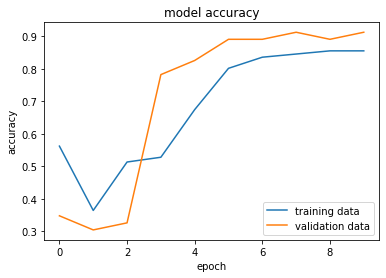

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

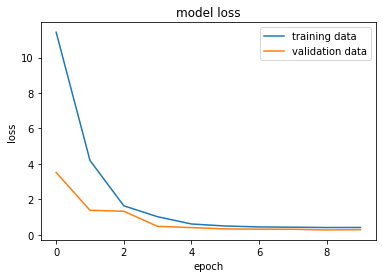

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [32]:
loss, accuracy = model2.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 0.1063 - accuracy: 0.9649
0.9649122953414917


In [33]:
Y_pred = model2.predict(X_test_std)
Y_pred

4/4 [==============================] - 0s 4ms/step


array([[2.89093912e-01, 7.76190639e-01],
       [4.03191030e-01, 5.45758665e-01],
       [2.80806571e-02, 8.86553884e-01],
       [9.99768674e-01, 2.95472855e-05],
       [4.51773882e-01, 6.12887442e-01],
       [9.90189731e-01, 1.72664237e-03],
       [1.56869203e-01, 8.04085910e-01],
       [3.22524607e-02, 8.10994804e-01],
       [7.16394857e-02, 7.81491160e-01],
       [7.45911896e-02, 7.77597487e-01],
       [4.51151222e-01, 3.98175359e-01],
       [1.27990708e-01, 6.55812681e-01],
       [1.76400766e-01, 8.99417996e-01],
       [2.16836438e-01, 6.13953531e-01],
       [5.51097170e-02, 7.89830506e-01],
       [9.31521833e-01, 8.80900621e-02],
       [4.86048386e-02, 8.15518260e-01],
       [4.62273359e-02, 9.30721760e-01],
       [1.22109309e-01, 8.95842195e-01],
       [9.81832683e-01, 5.22317737e-03],
       [2.42463544e-01, 9.37974215e-01],
       [4.95055094e-02, 9.20511305e-01],
       [4.41415459e-02, 8.18369150e-01],
       [3.31092104e-02, 8.10096920e-01],
       [2.454072

model.predict() gives the prediction probability of each class for that data point

In [34]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [35]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [37]:
input_data = (14.54,27.54,96.73,658.8,0.1139,0.1595,0.1639,0.07364,0.2303,0.07077,0.37,1.033,2.879,32.55,0.005607,0.0424,0.04741,0.0109,0.01857,0.005466,17.46,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.1341)
# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model2.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 60ms/step
[[0.8392904  0.03781575]]
[0]
The tumor is Malignant


C:\Users\MadhavaRaj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
